# Correlation analysis

## Libraries and settings

In [16]:
# Libraries
import os
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show path to the current working directory
print('Current working directory:', os.getcwd())

Current working directory: /workspaces/data_analytics/Week_07


## Import the apartment data

In [17]:
# Define columns
columns = ['web-scraper-order',
            'address_raw',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'rooms', 
            'area', 
            'luxurious', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct',
            'mean_taxable_income']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";")[columns]

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268


## Scatterplot-matrix

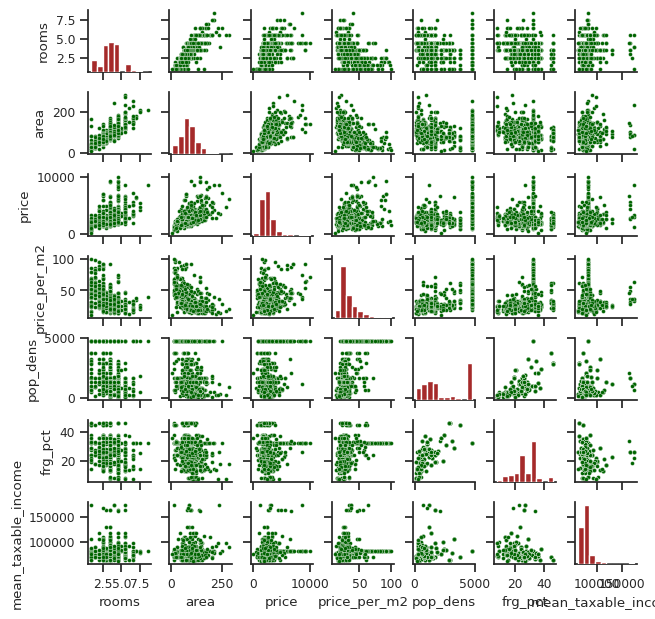

In [18]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms',
                     'area',
                     'price',
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct',
                     'mean_taxable_income']], 
                 height=0.9, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=8)
g.map_lower(sns.scatterplot, color='darkgreen', s=8)
g.map_diag(plt.hist, color='brown')

## Scatterplots and Pearson correlation of selected variables

### Scatterplot price versus area

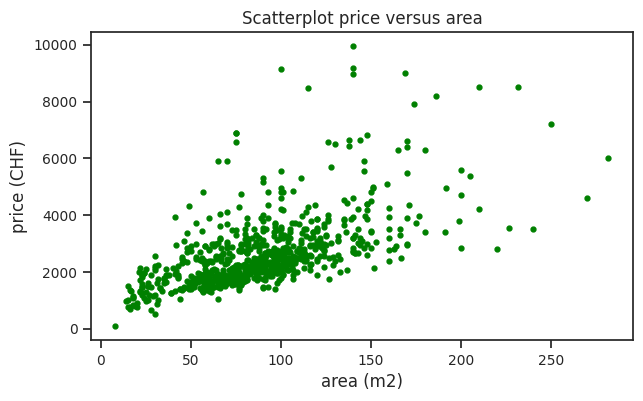

In [19]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price versus area', fontsize=12)
plt.ylabel('price (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price versus area

In [20]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): 0.6120
p-value: 0.0000


### Scatterplot price_per_m2 versus area

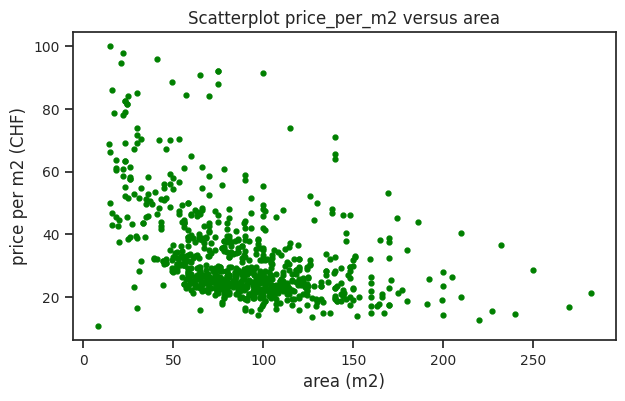

In [21]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price_per_m2'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price_per_m2 versus area', fontsize=12)
plt.ylabel('price per m2 (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price_per_m2 versus area

In [22]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.4564
p-value: 0.0000


### Log-transform price_per_m2 and area to make the relationship linear

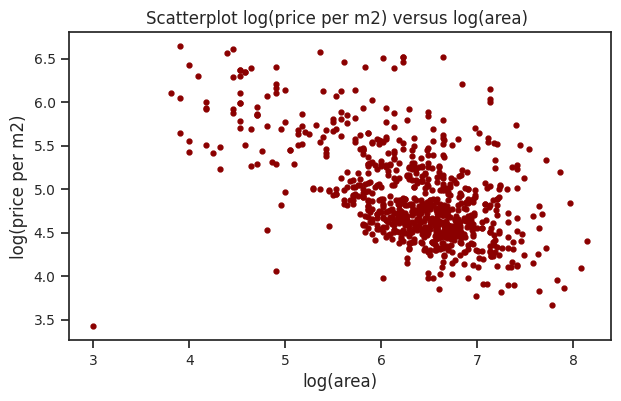

In [23]:
# Transform values of price_per_m2 to make it linear
df['log_price_per_m2'] = np.log2(df['price_per_m2'])
df['log_area'] = np.log2(df['area'])

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['log_area'], 
         df['log_price_per_m2'], 
         'o', 
         markersize=3.5,
         color="darkred")

# Add title and axes labels
plt.title('Scatterplot log(price per m2) versus log(area) ', fontsize=12)
plt.ylabel('log(price per m2)', fontsize=12)
plt.xlabel('log(area)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation log(price_per_m2) versus log(area)

In [24]:
# Perform Pearson's correlation
res = scipy.stats.pearsonr(df['log_area'], df['log_price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

Persons correlation coefficient (r): -0.5556
p-value: 0.0000


## Correlation analysis based on car data

### Import car data

In [25]:
import pandas as pd

# Define columns for import
columns = ['Offer_Id',
          'Type',
          'Init_Regist',
          'Kilometer',
          'Price_Num',
          'PS_Num']

# Read the data and show header info
df_cars = pd.read_csv('autoscout24_data.csv', sep=";")[columns]

# Kilometer to numeric value
df_cars['Kilometer_Num'] = df_cars['Kilometer'].str.replace(' km', '').str.replace('\'', '').astype('int64')

# Remove original column 'Kilometer' 
df_cars = df_cars.drop(columns=['Kilometer'])

# Rename columns
df_cars = df_cars.rename(columns={'Price_Num':'Price', 'PS_Num':'PS', 'Kilometer_Num':'Kilometer'})
print('Number of rows and columns:', df_cars.shape)

# print header info
df_cars

Number of rows and columns: (3980, 6)


,Offer_Id,Type,Init_Regist,Price,PS,Kilometer
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,10.2014,22500,245,75000
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),6.2013,23749,184,46655
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,6.2011,18500,306,138955
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,8.2015,36000,360,43000
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,9.2018,48500,252,43300
...,...,...,...,...,...,...
3975,7137137,FERRARI F360 Spider (Cabriolet),2.2002,58400,400,78000
3976,6758841,MERCEDES-BENZ SL 500 560 SL (Cabriolet),1.1987,15900,232,315000
3977,7461330,MERCEDES-BENZ CL 63 AMG 7G-Tronic (Coupé),8.2007,42000,525,85000
3978,7005403,BMW 328i Cabrio (Cabriolet),8.1995,9980,193,188920


### Exploring Numerical Variables

In [26]:
# Select numerical variables
numerical_data = df_cars[["Price", "Kilometer", "PS"]]

# Display descriptive statistics
print(numerical_data.describe())


               Price      Kilometer           PS
count    3980.000000    3980.000000  3980.000000
mean    27678.180905   92769.216080   236.035427
std     27280.856305   61161.794535   120.088677
min       160.000000       1.000000    16.000000
25%     10900.000000   45000.000000   150.000000
50%     19900.000000   83350.000000   204.000000
75%     35900.000000  130000.000000   306.000000
max    428000.000000  370000.000000   800.000000


### Visualizing Relationships with Scatterplots

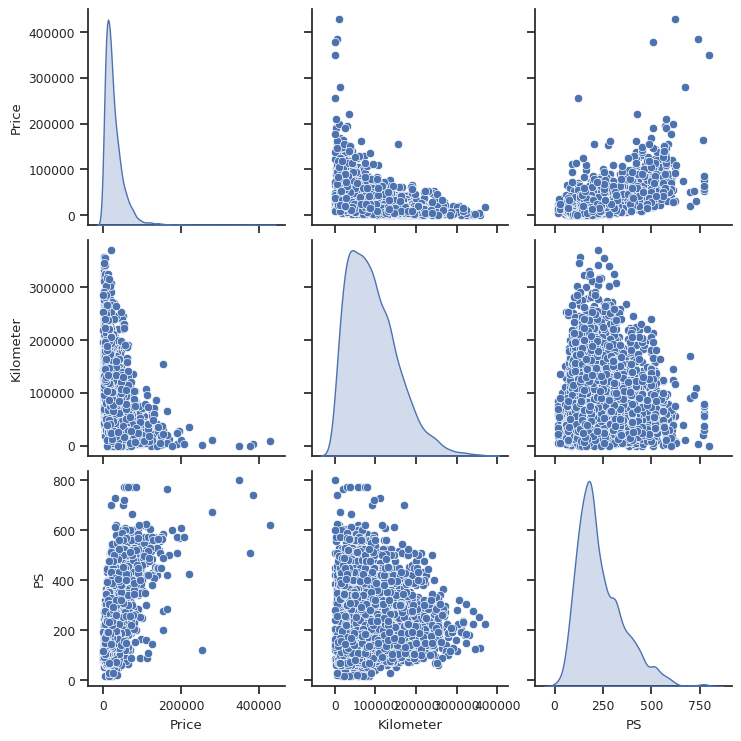

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate scatterplots with distributions
sns.pairplot(numerical_data, diag_kind="kde")
plt.show()

### Correlation Analysis and Statistical Significance

In [28]:
from scipy.stats import pearsonr

# Function to compute correlation and significance
def correlation_analysis(df, var1, var2):
    corr, p_value = pearsonr(df[var1], df[var2])
    return corr, p_value

# Analyze correlations for specified variable pairs
results = {}
for pair in [("Price", "Kilometer"), ("Price", "PS"), ("Kilometer", "PS")]:
    corr, p_value = correlation_analysis(numerical_data, pair[0], pair[1])
    results[pair] = {"Correlation": corr, "P-Value": p_value}

# Display the results
for pair, stats in results.items():
    print(f"Variables: {pair[0]} vs {pair[1]}")
    print(f"  Correlation: {stats['Correlation']:.4f}")
    print(f"  P-Value: {stats['P-Value']:.4f}")
    print()

Variables: Price vs Kilometer
  Correlation: -0.4341
  P-Value: 0.0000

Variables: Price vs PS
  Correlation: 0.6171
  P-Value: 0.0000

Variables: Kilometer vs PS
  Correlation: -0.1282
  P-Value: 0.0000



### Results of Correlation Analysis

1. **Price vs Kilometer**:
   - **Correlation:** -0.4341
   - **P-value:** 0.0000
   - **Interpretation:** There is a moderate negative correlation between Price and Kilometers Driven. Since the p-value is less than 0.05, this correlation is statistically significant. This indicates that cars with higher kilometers driven tend to have lower prices.

2. **Price vs PS**:
   - **Correlation:** 0.6171
   - **P-value:** 0.0000
   - **Interpretation:** There is a strong positive correlation between Price and PS. Since the p-value is less than 0.05, this correlation is statistically significant. This indicates that cars with higher horsepower tend to have higher prices.

3. **Kilometer vs PS**:
   - **Correlation:** -0.1282
   - **P-value:** 0.0000
   - **Interpretation:** There is a weak negative correlation between Kilometers Driven and PS. Since the p-value is less than 0.05, this correlation is statistically significant. This indicates that cars with higher kilometers driven tend to have slightly lower horsepower.

### Conclusion:
All correlations in this analysis are statistically significant (p-value < 0.05). Price is moderately negatively correlated with Kilometers Driven, strongly positively correlated with PS, and Kilometers Driven is weakly negatively correlated with PS.


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [29]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-14 22:46:10
Python Version: 3.11.10
-----------------------------------
